Correlation with 'daydream_imagine':
 daydream_imagine                 1.000000
today_compare_future_imagined    0.460678
afraid_growing_up                0.046374
stories_books_movies            -0.106271
Timestamp                       -0.155847
create_worlds_mind              -0.169526
movies_books_as_escape          -0.217962
imagine_future                  -0.237185
tired_relax_way                 -0.529015
Name: daydream_imagine, dtype: float64

Top relationships:
 daydream_imagine                 1.000000
today_compare_future_imagined    0.460678
Name: daydream_imagine, dtype: float64


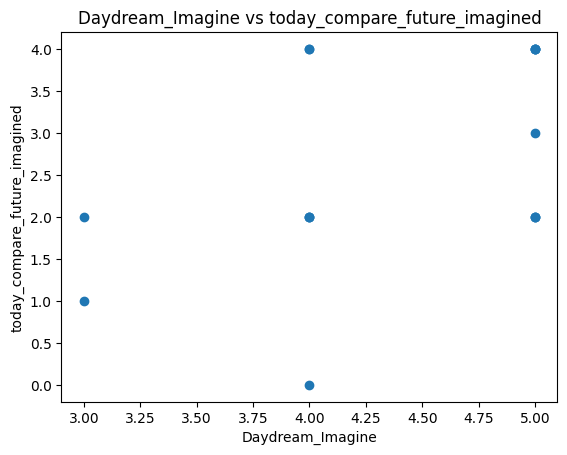

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'Beichen_Form.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Create a copy of the dataframe for manipulation
df_encoded = df.copy()

# Manually encode categorical columns by mapping unique values to numbers
for column in df.select_dtypes(include=['object']).columns:
    df_encoded[column] = df_encoded[column].astype('category').cat.codes

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Extract the correlations related to 'daydream_imagine'
daydream_corr = correlation_matrix['daydream_imagine'].sort_values(ascending=False)
print("Correlation with 'daydream_imagine':\n", daydream_corr)

# Identify the top relationships
top_correlations = daydream_corr[daydream_corr > 0.3]  # Adjust threshold if needed
print("\nTop relationships:\n", top_correlations)

# Visualization of the strongest relationships
for column in top_correlations.index:
    if column != 'daydream_imagine':
        plt.scatter(df_encoded['daydream_imagine'], df_encoded[column])
        plt.title(f'Daydream_Imagine vs {column}')
        plt.xlabel('Daydream_Imagine')
        plt.ylabel(column)
        plt.show()
        

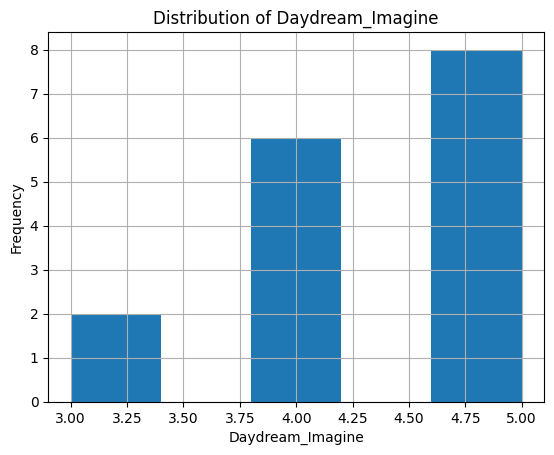

In [4]:
df['daydream_imagine'].hist(bins=5)
plt.title('Distribution of Daydream_Imagine')
plt.xlabel('Daydream_Imagine')
plt.ylabel('Frequency')
plt.show()

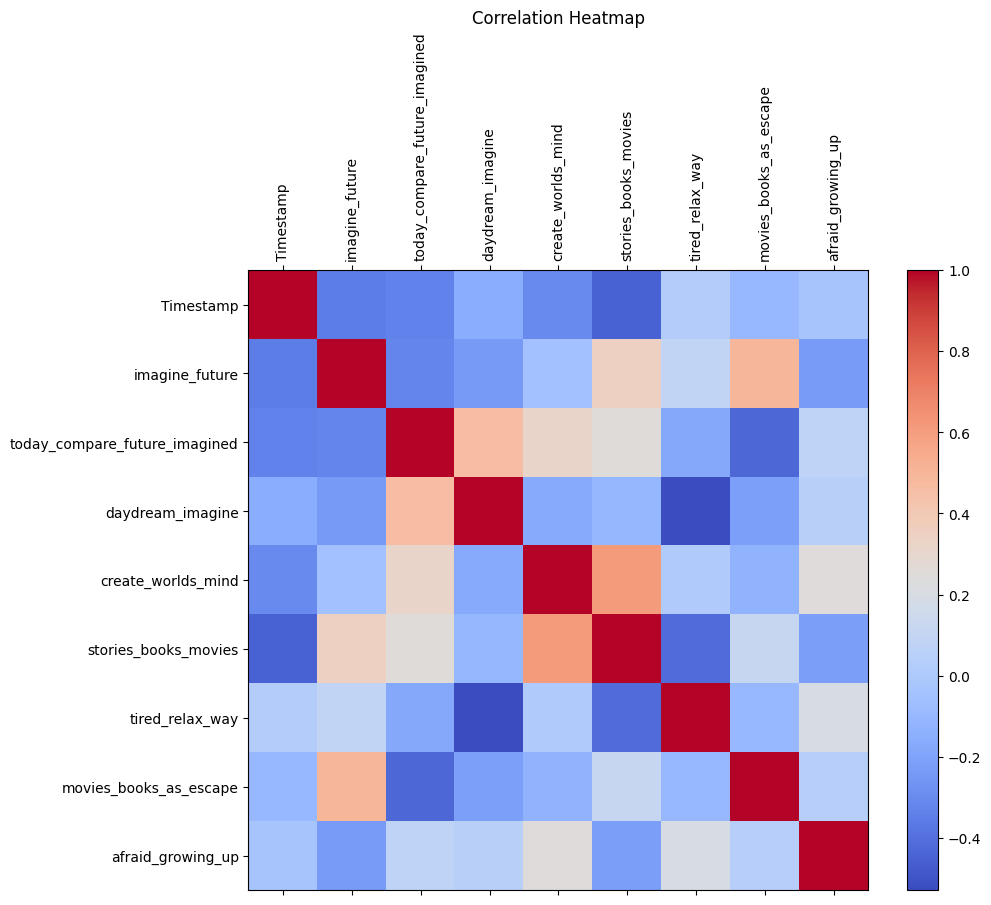

In [5]:
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, rotation=90)
plt.yticks(range(correlation_matrix.shape[1]), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Heatmap')
plt.show()

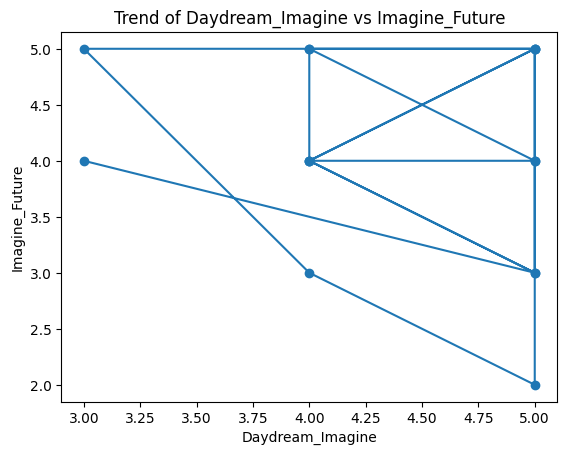

In [6]:
plt.plot(df_encoded['daydream_imagine'], df_encoded['imagine_future'], marker='o')
plt.title('Trend of Daydream_Imagine vs Imagine_Future')
plt.xlabel('Daydream_Imagine')
plt.ylabel('Imagine_Future')
plt.show()

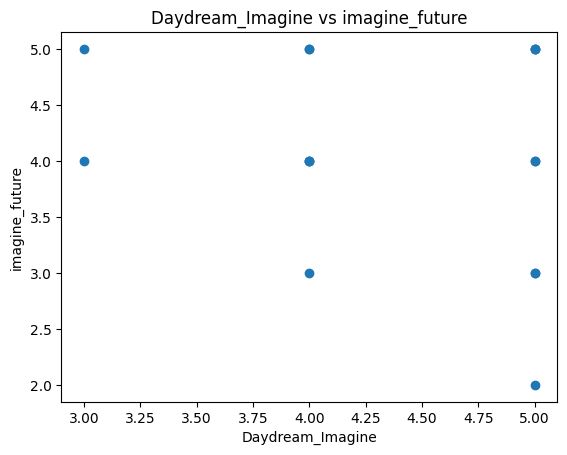

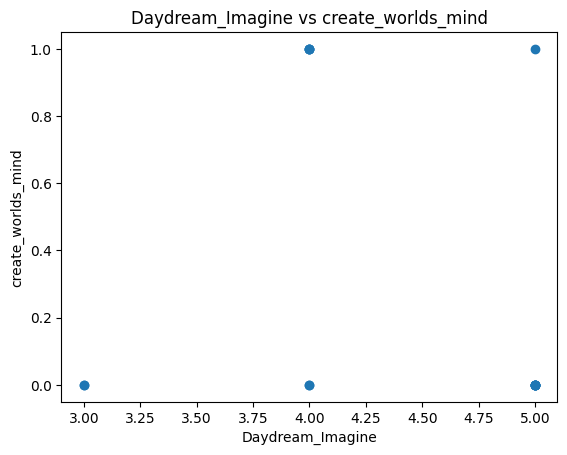

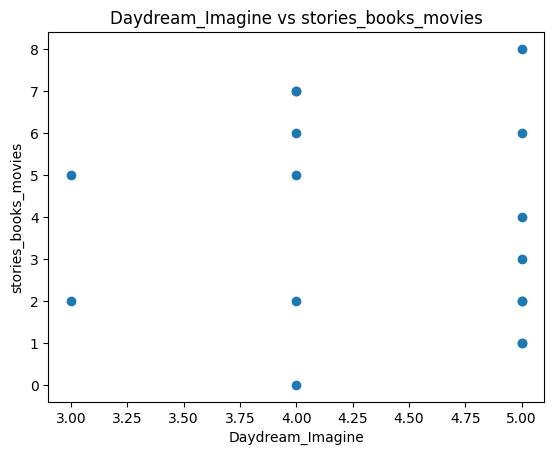

In [7]:
for col in ['imagine_future', 'create_worlds_mind', 'stories_books_movies']:
    plt.scatter(df_encoded['daydream_imagine'], df_encoded[col])
    plt.title(f'Daydream_Imagine vs {col}')
    plt.xlabel('Daydream_Imagine')
    plt.ylabel(col)
    plt.show()

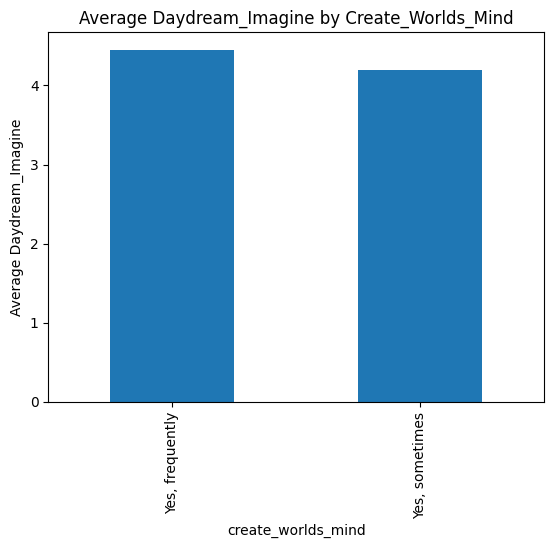

In [8]:
df.groupby('create_worlds_mind')['daydream_imagine'].mean().plot(kind='bar')
plt.title('Average Daydream_Imagine by Create_Worlds_Mind')
plt.ylabel('Average Daydream_Imagine')
plt.show()

In [21]:

data = pd.read_csv(file_path)

# Data Overview
print("Data Overview:")
print(data.head())

# Frequency Counts for Categorical Columns
categorical_columns = [
    'today_compare_future_imagined', 
    'daydream_imagine', 
    'create_worlds_mind', 
    'stories_books_movies', 
    'tired_relax_way', 
    'movies_books_as_escape', 
    'afraid_growing_up'
]

frequency_counts = {col: data[col].value_counts() for col in categorical_columns}

# Function to plot frequency counts
def plot_frequency_counts(counts, title):
    counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
    plt.title(title)
    plt.xlabel(counts.name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Data Overview:
                   Timestamp  imagine_future today_compare_future_imagined  \
0  2024/10/17 1:56:44 pm CET               5          Completely different   
1  2024/10/17 2:04:04 pm CET               4          Completely different   
2  2024/10/17 2:04:26 pm CET               4              Somewhat similar   
3  2024/10/17 2:06:04 pm CET               5              Somewhat similar   
4  2024/10/17 2:06:28 pm CET               4              Somewhat similar   

   daydream_imagine create_worlds_mind stories_books_movies tired_relax_way  \
0                 4    Yes, frequently              Mystery           Sleep   
1                 5    Yes, frequently               Horror      Play games   
2                 4     Yes, sometimes      Science Fiction           Sleep   
3                 5    Yes, frequently              Fantasy        Watch TV   
4                 4     Yes, sometimes      Science Fiction           Sleep   

  movies_books_as_escape afraid_growing_u

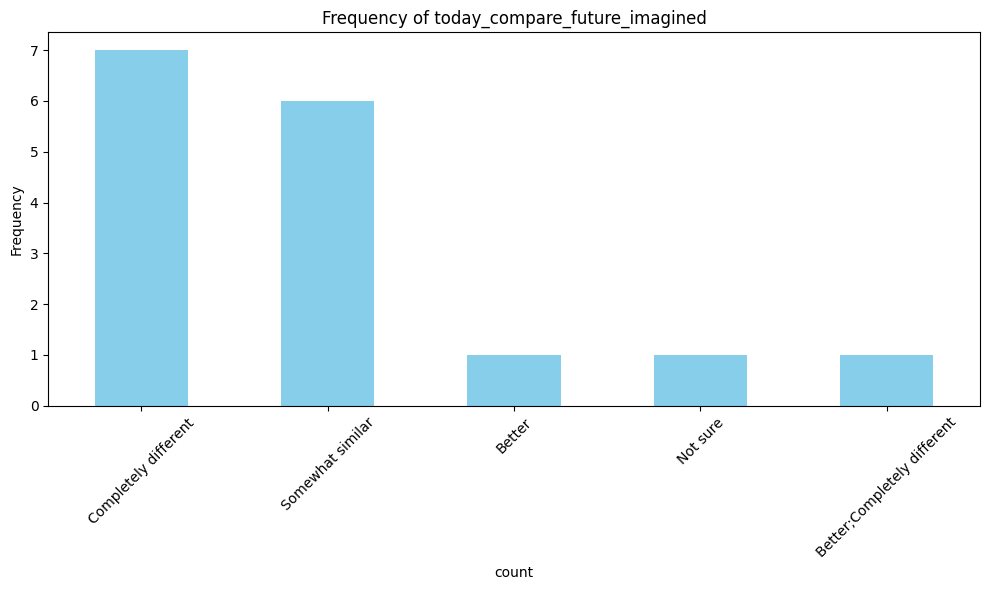

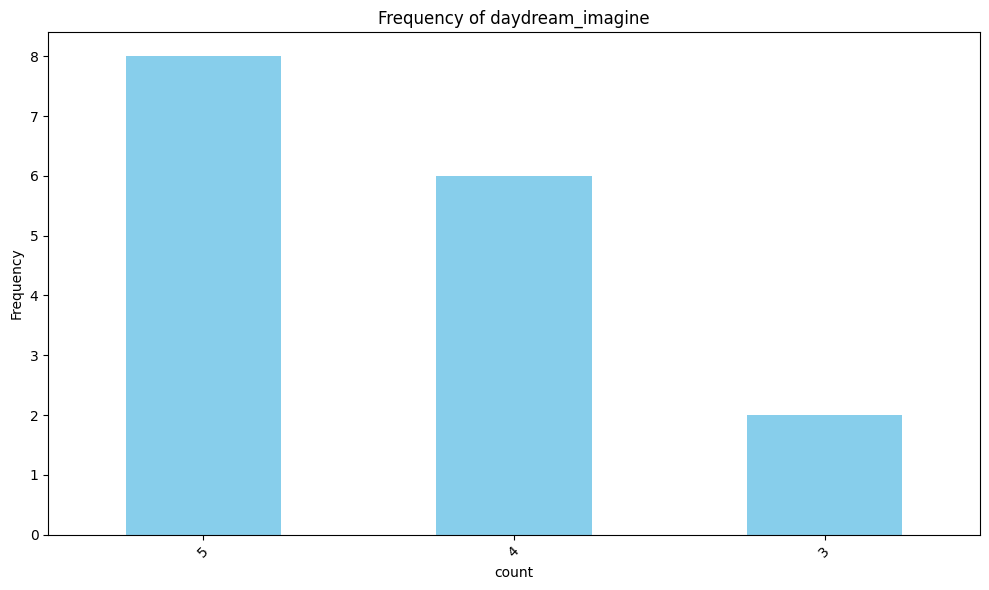

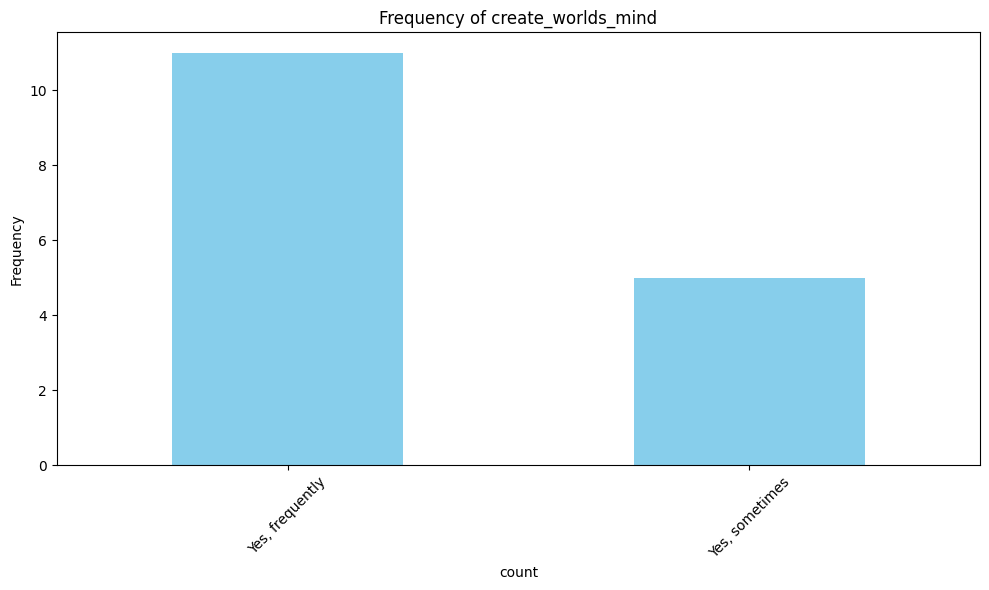

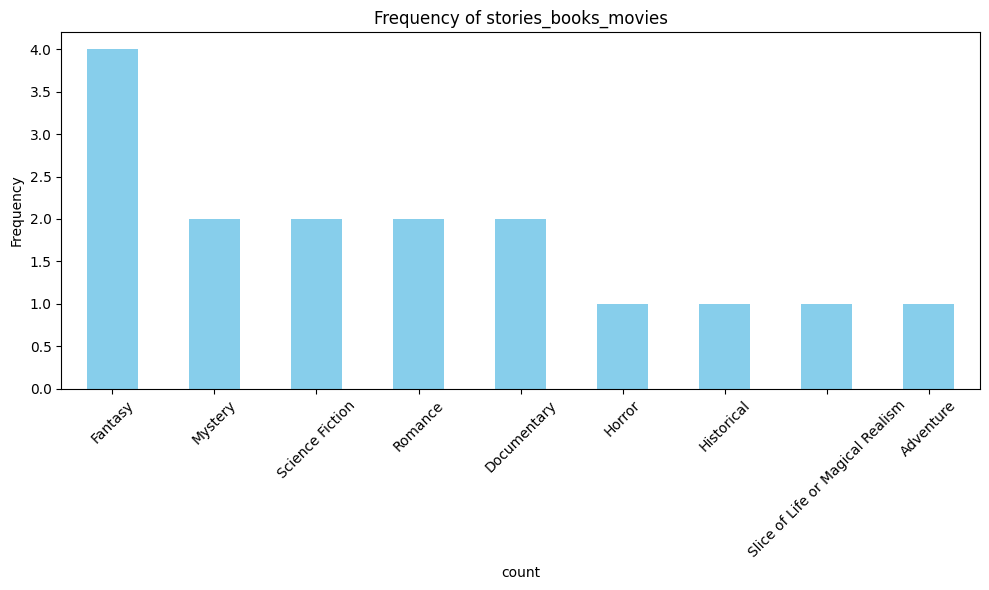

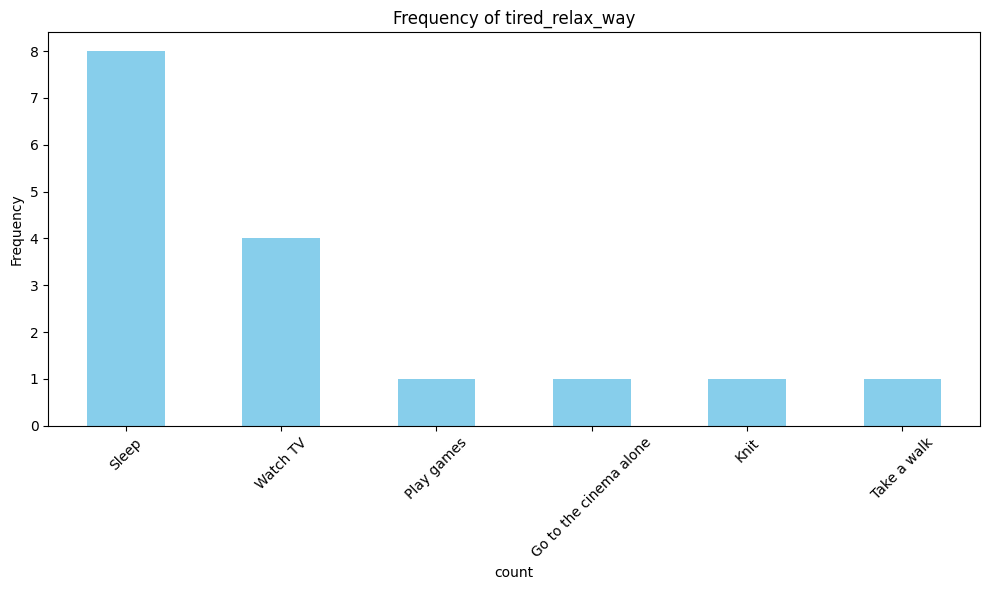

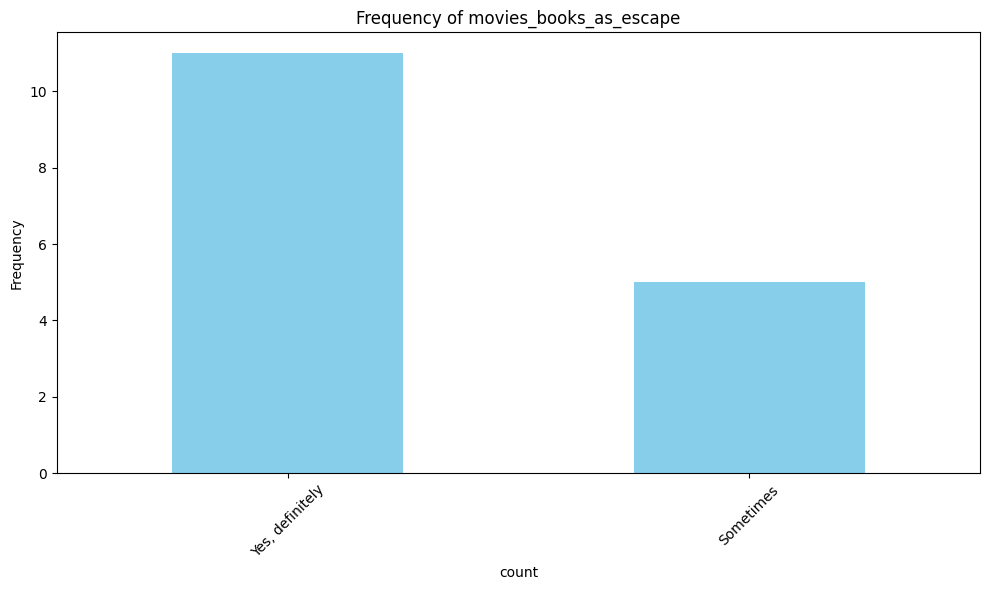

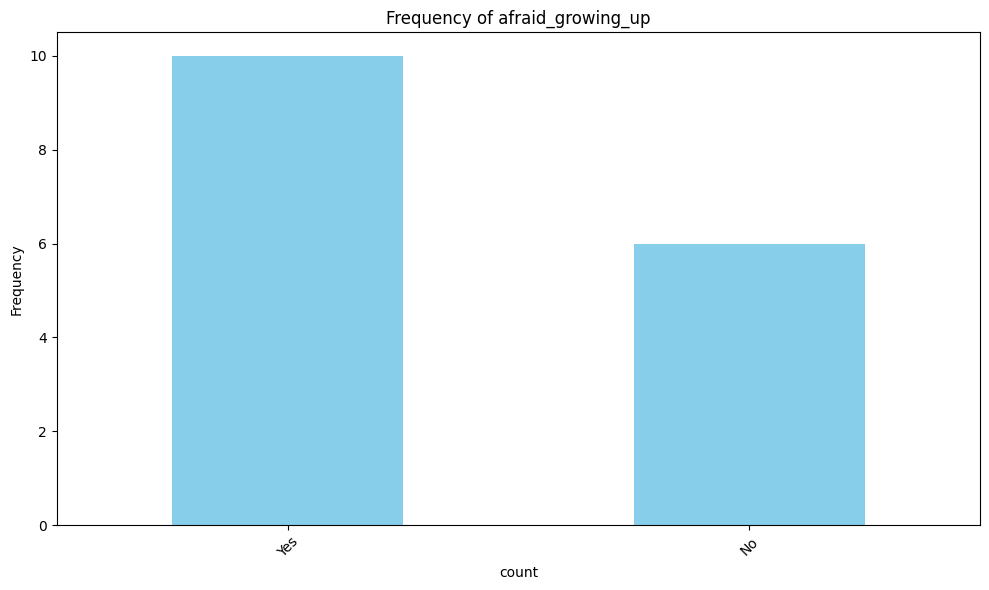

In [22]:
# Plot frequency counts for each categorical variable
for col, counts in frequency_counts.items():
    plot_frequency_counts(counts, f'Frequency of {col}')


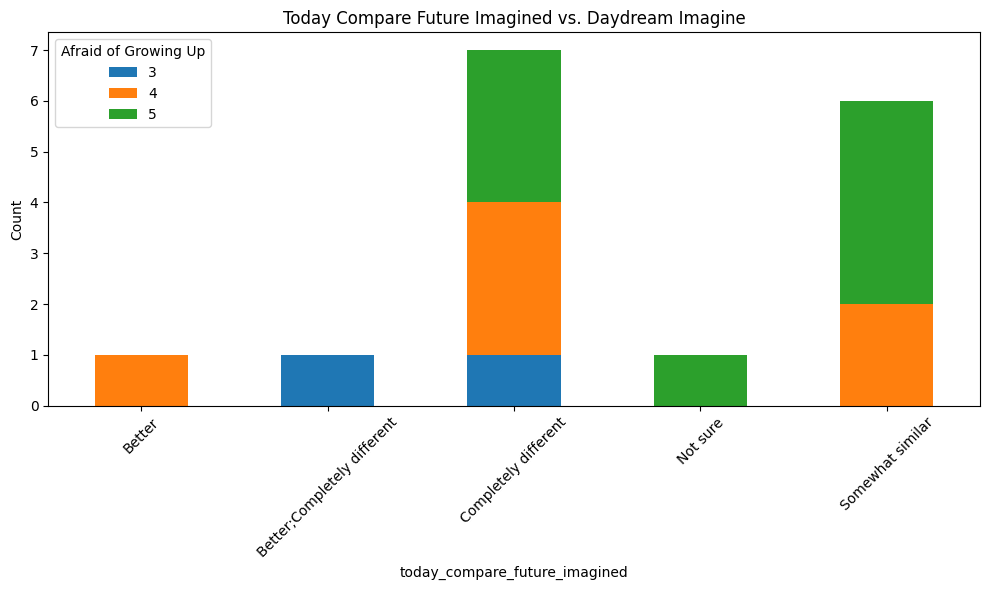

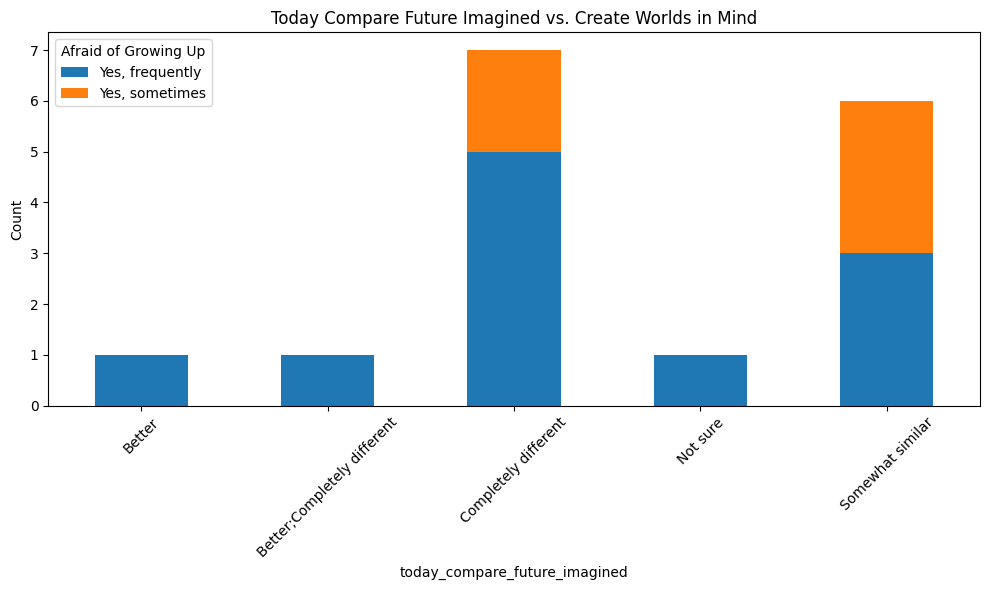

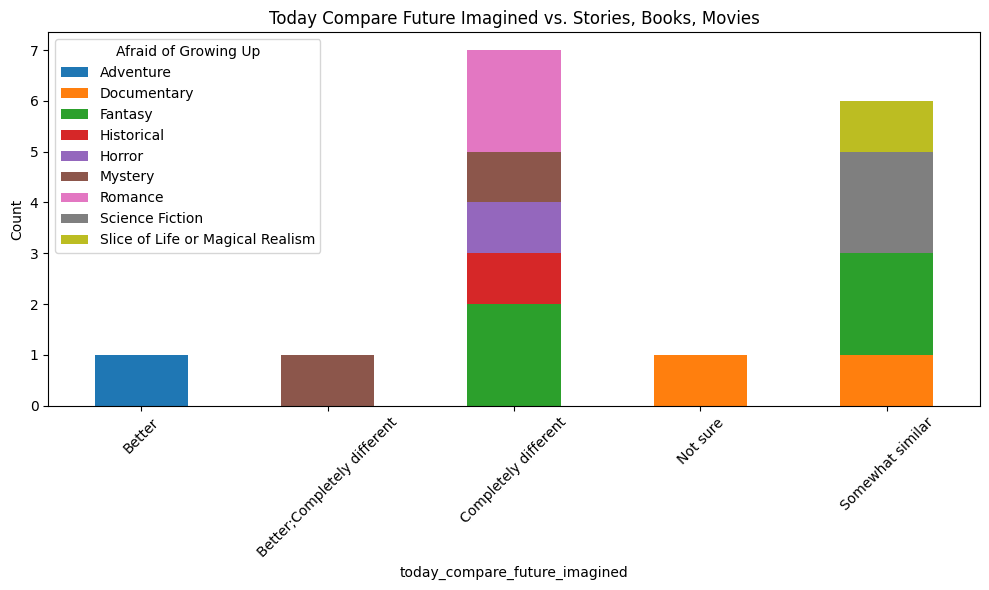

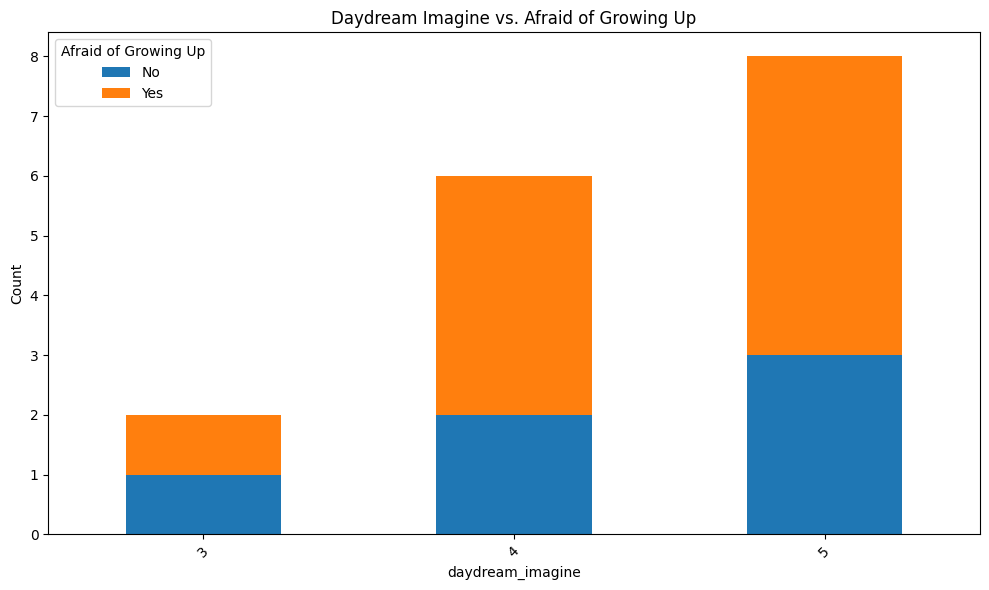

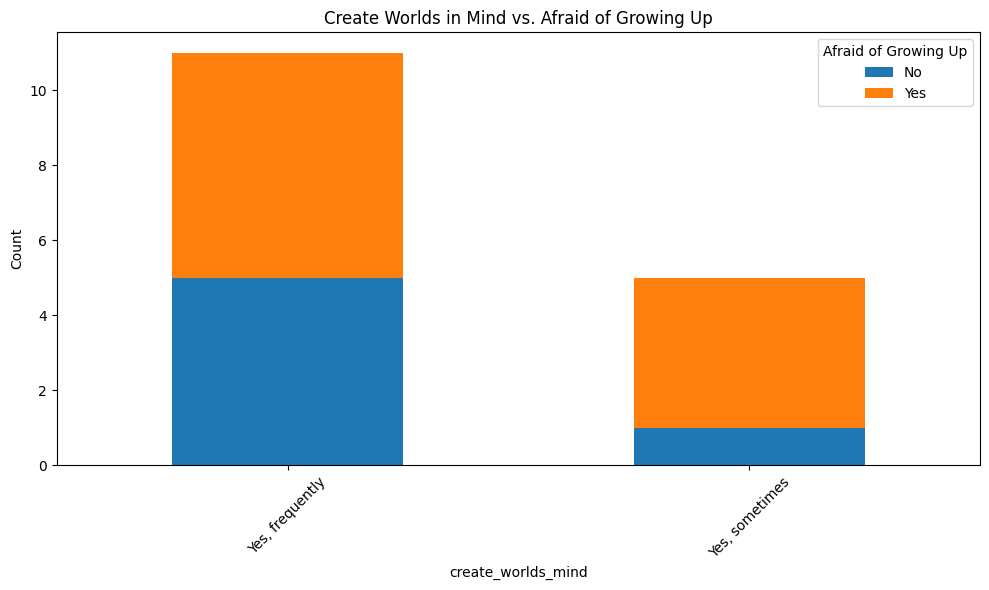

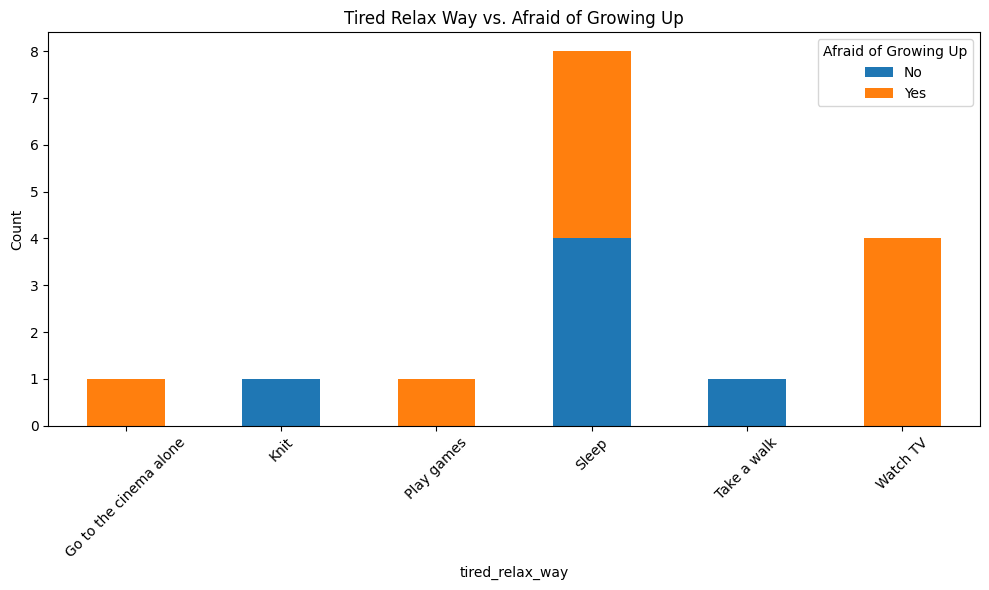

In [37]:
# Creating cross-tabulations between each pair of categorical columns
cross_tabulations = {}
for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        col1 = categorical_columns[i]
        col2 = categorical_columns[j]
        cross_tab = pd.crosstab(data[col1], data[col2])
        cross_tabulations[(col1, col2)] = cross_tab

# Displaying a selection of cross-tabulations for review
cross_tabulations_display = {k: v for k, v in cross_tabulations.items()}
cross_tabulations_display

# Function to visualize specific cross-tabulated relationships using Matplotlib
# Function to visualize specific cross-tabulated relationships using Matplotlib with customizable legend titles
# Function to visualize specific cross-tabulated relationships using Matplotlib with customizable legend titles
def plot_cross_tabulation(cross_tab, title):
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(title)
    plt.xlabel(cross_tab.index.name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Afraid of Growing Up')
    plt.tight_layout()
    plt.show()

# Visualizing selected cross-tabulations
selected_cross_tabs = [
    (cross_tabulations[('today_compare_future_imagined', 'daydream_imagine')], 
     'Today Compare Future Imagined vs. Daydream Imagine'),
    
    (cross_tabulations[('today_compare_future_imagined', 'create_worlds_mind')], 
     'Today Compare Future Imagined vs. Create Worlds in Mind'),
    
    (cross_tabulations[('today_compare_future_imagined', 'stories_books_movies')], 
     'Today Compare Future Imagined vs. Stories, Books, Movies'),
    
    (cross_tabulations[('daydream_imagine', 'afraid_growing_up')], 
     'Daydream Imagine vs. Afraid of Growing Up'),
    
    (cross_tabulations[('create_worlds_mind', 'afraid_growing_up')], 
     'Create Worlds in Mind vs. Afraid of Growing Up'),
    
    (cross_tabulations[('tired_relax_way', 'afraid_growing_up')], 
     'Tired Relax Way vs. Afraid of Growing Up')
]

# Plotting the selected cross-tabulations
for cross_tab, title in selected_cross_tabs:
    plot_cross_tabulation(cross_tab, title)
